# Lista 06 - Gradiente Descendente e Regressão Multivariada

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import *

plt.ion()

Hoje vamos fazer um gradiente descendente para uma regressão linear com múltiplas variáveis.

Para isso, utilizaremos a base de dados carros, ``hybrid.csv``. As colunas são definidas da seguinte forma:

* veículo (vehicle): modelo do carro

* ano (year): ano de fabricação

* msrp: preço de varejo em dólar sugerido pelo fabricante em 2013.

* aceleração (acceleration): taxa de aceleração em km por hora por segundo

* mpg: economia de combustível em milhas por galão

* classe (class): a classe do modelo.

Nosso objetivo será estimar o valor de preço sugerido dos carros a partir dos demais atributos (exluindo o nome do veículo e a classe).
Portanto, teremos a regressão definida pela fórmula:

$$ Y = X\Theta + \epsilon $$

Em que, Y corresponde à coluna ``msrp`` dos dados, e X corresponde às colunas ``year,acceleration,mpg``.

In [2]:
df = pd.read_csv('./hybrid.csv')
df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact


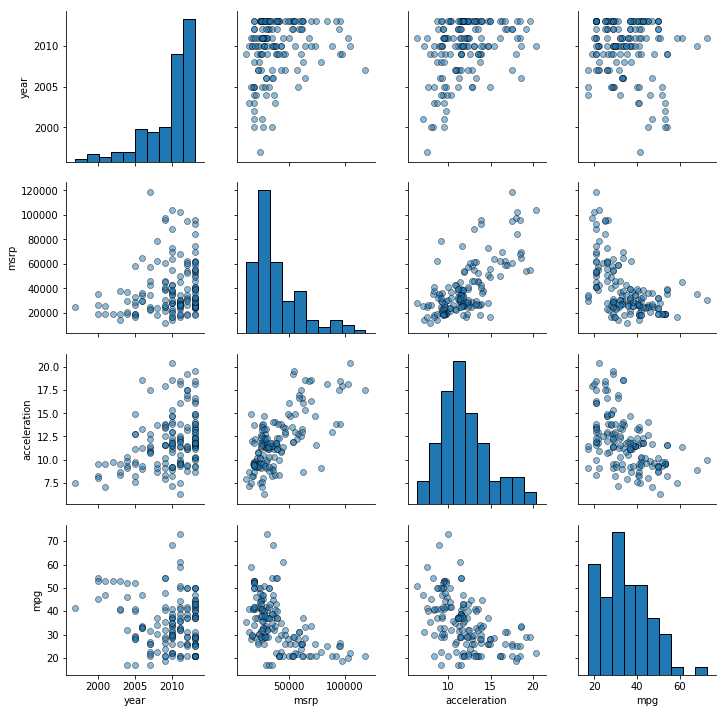

In [3]:
import seaborn as sns
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

Selecionamos apenas as colunas que serão utilizadas.

Normalizamos os dados para que o gradiente descendente rode sem problemas.

In [19]:
y = df['msrp']
X = df[['year','acceleration','mpg']]

X -= X.mean()
X /= X.std(ddof=1)
y -= y.mean()
y /= y.std(ddof=1)

X.insert(0, 'intercept', 1.0)

X = X.values
y = y.values

__IMPORTANTE:__
Não crie ou utilize qualquer variável ou função com nome iniciado por ``_teste_``.

A) Implemente a função de gradiente dos parâmetros da regressão, retornando um array com os valores dos gradientes para cada parâmetro theta.

In [1]:
def derivadas_regressao(theta, X, y):
    return -2 * ((y - X @ theta) * X.T).mean(axis=1)

def gradients(theta, X, y):
    # x : matriz nxm
    # y : array nx1
    # theta : array mx1
    # YOUR CODE HERE
    grad = derivadas_regressao(theta, X, y)
    return grad

In [21]:
thetas = np.ones(4)
gradients(thetas, X, y)

array([2.        , 1.94660291, 0.31349814, 1.70044856])

B) Implemente a função de gradiente descendente para os parâmetros da regressão linear. 

Retorne uma lista com o valor de alpha e os valores de beta para cada coluna, nessa ordem.

In [23]:
def descent(theta0, X, y, learning_rate=0.005, tolerance=0.0000001):
    theta = theta0
    print('Iter {}; theta = '.format(0), theta)
    old_err_sq = np.inf
    i = 0
    while True:
        # Computar as derivadas
        grad = gradients(theta, X, y)
        
        # Atualizar
        theta_novo = theta - learning_rate * grad
        
        # Parar quando o erro convergir
        err_sq = ((X.dot(theta) - y) ** 2).mean()
        if np.abs(old_err_sq - err_sq) <= tolerance:
            break
        
        theta = theta_novo
        old_err_sq = err_sq
        print('Iter {}; theta = '.format(i+1), theta)
        i += 1
    return theta

In [24]:
thetas = np.ones(X.shape[1])
theta = descent(thetas, X, y)
theta

Iter 0; theta =  [1. 1. 1. 1.]
Iter 1; theta =  [0.99       0.99026699 0.99843251 0.99149776]
Iter 2; theta =  [0.9801     0.98062191 0.9968726  0.98305567]
Iter 3; theta =  [0.970299   0.97106397 0.99532018 0.97467332]
Iter 4; theta =  [0.96059601 0.96159238 0.99377518 0.96635031]
Iter 5; theta =  [0.95099005 0.95220634 0.9922375  0.95808623]
Iter 6; theta =  [0.94148015 0.9429051  0.99070706 0.94988067]
Iter 7; theta =  [0.93206535 0.93368787 0.98918378 0.94173323]
Iter 8; theta =  [0.92274469 0.92455389 0.98766759 0.93364351]
Iter 9; theta =  [0.91351725 0.91550242 0.9861584  0.92561112]
Iter 10; theta =  [0.90438208 0.90653269 0.98465615 0.91763566]
Iter 11; theta =  [0.89533825 0.89764398 0.98316075 0.90971673]
Iter 12; theta =  [0.88638487 0.88883554 0.98167213 0.90185396]
Iter 13; theta =  [0.87752102 0.88010665 0.98019022 0.89404694]
Iter 14; theta =  [0.86874581 0.8714566  0.97871496 0.88629529]
Iter 15; theta =  [0.86005835 0.86288465 0.97724626 0.87859863]
Iter 16; theta =  

Iter 315; theta =  [ 0.04217803 -0.00790764  0.70942065 -0.07728707]
Iter 316; theta =  [ 0.04175625 -0.00840861  0.7089228  -0.0782494 ]
Iter 317; theta =  [ 0.04133869 -0.00890445  0.70842684 -0.07920552]
Iter 318; theta =  [ 0.0409253  -0.00939521  0.70793277 -0.08015547]
Iter 319; theta =  [ 0.04051605 -0.00988094  0.70744058 -0.0810993 ]
Iter 320; theta =  [ 0.04011089 -0.01036167  0.70695028 -0.08203704]
Iter 321; theta =  [ 0.03970978 -0.01083746  0.70646184 -0.08296875]
Iter 322; theta =  [ 0.03931268 -0.01130835  0.70597528 -0.08389446]
Iter 323; theta =  [ 0.03891955 -0.01177439  0.70549057 -0.08481421]
Iter 324; theta =  [ 0.03853036 -0.01223562  0.70500773 -0.08572805]
Iter 325; theta =  [ 0.03814505 -0.01269209  0.70452673 -0.08663602]
Iter 326; theta =  [ 0.0377636  -0.01314383  0.70404757 -0.08753815]
Iter 327; theta =  [ 0.03738597 -0.01359091  0.70357025 -0.0884345 ]
Iter 328; theta =  [ 0.03701211 -0.01403335  0.70309476 -0.08932509]
Iter 329; theta =  [ 0.03664199 -0

Iter 678; theta =  [ 0.00109815 -0.0491896   0.61423783 -0.21773121]
Iter 679; theta =  [ 0.00108717 -0.04917768  0.61412689 -0.21784652]
Iter 680; theta =  [ 0.0010763  -0.04916568  0.61401643 -0.21796122]
Iter 681; theta =  [ 0.00106553 -0.0491536   0.61390645 -0.21807532]
Iter 682; theta =  [ 0.00105488 -0.04914143  0.61379694 -0.21818882]
Iter 683; theta =  [ 0.00104433 -0.04912919  0.61368791 -0.21830171]
Iter 684; theta =  [ 0.00103389 -0.04911687  0.61357935 -0.21841402]
Iter 685; theta =  [ 0.00102355 -0.04910447  0.61347125 -0.21852573]
Iter 686; theta =  [ 0.00101331 -0.049092    0.61336363 -0.21863686]
Iter 687; theta =  [ 0.00100318 -0.04907946  0.61325647 -0.2187474 ]
Iter 688; theta =  [ 0.00099315 -0.04906684  0.61314978 -0.21885736]
Iter 689; theta =  [ 0.00098322 -0.04905416  0.61304355 -0.21896675]
Iter 690; theta =  [ 0.00097338 -0.04904141  0.61293777 -0.21907556]
Iter 691; theta =  [ 0.00096365 -0.04902859  0.61283246 -0.2191838 ]
Iter 692; theta =  [ 0.00095401 -0

Iter 1063; theta =  [ 2.29198545e-05 -4.45841677e-02  5.93564843e-01 -2.37283871e-01]
Iter 1064; theta =  [ 2.26906560e-05 -4.45771922e-02  5.93544532e-01 -2.37301092e-01]
Iter 1065; theta =  [ 2.24637494e-05 -4.45702425e-02  5.93524312e-01 -2.37318232e-01]
Iter 1066; theta =  [ 2.22391119e-05 -4.45633186e-02  5.93504181e-01 -2.37335292e-01]
Iter 1067; theta =  [ 2.20167208e-05 -4.45564204e-02  5.93484140e-01 -2.37352273e-01]
Iter 1068; theta =  [ 2.17965536e-05 -4.45495479e-02  5.93464187e-01 -2.37369173e-01]
Iter 1069; theta =  [ 2.15785881e-05 -4.45427009e-02  5.93444324e-01 -2.37385995e-01]
Iter 1070; theta =  [ 2.13628022e-05 -4.45358794e-02  5.93424549e-01 -2.37402737e-01]
Iter 1071; theta =  [ 2.11491742e-05 -4.45290833e-02  5.93404861e-01 -2.37419401e-01]
Iter 1072; theta =  [ 2.09376824e-05 -4.45223126e-02  5.93385262e-01 -2.37435988e-01]
Iter 1073; theta =  [ 2.07283056e-05 -4.45155672e-02  5.93365749e-01 -2.37452496e-01]
Iter 1074; theta =  [ 2.05210226e-05 -4.45088470e-02  

array([ 1.42911114e-05, -4.42831072e-02,  5.92701667e-01, -2.38011994e-01])

C) Agora vamos tentar avaliar o modelo de regressão linear obtido com o gradiente descendente.

Primeiro implementem uma função que calcule o valor da soma total dos quadrados (SST) a partir dos dados.

In [25]:
def sst(y):
    y_mean = np.mean(y)
    return sum((y - y_mean)*(y - y_mean))

In [40]:
def plot_regression(x, y, lambda_=0.1, niter=100, param0=1):
    # x,y : dados
    # lambda_ : taxa de aprendizado
    # niter : número de iterações do gradiente descendente
    # param0 : lista com valores iniciais para alpha e beta
    
    #print(ss.linregress(x, y))
    #val = descent(x, y, lambda_, niter, param0)
    #y_model = val[1] * x + val[0]
    plt.scatter(x[:, 2], y, alpha=0.8, edgecolors='k', s=80)
    #plt.plot(x, y_model, color='magenta')
    plt.show()

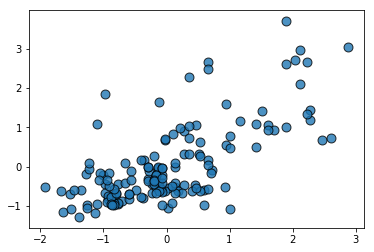

In [41]:
plot_regression(X, y)

D) Para calcular a soma total de erros (SSE), primeiro precisamos ter uma previsão para os valores de
 preço dos apartamentos.
Implementem uma função que obtenha os valores estimativa de preço a partir dos demais atributos, de acordo com o modelo de regressão linear.

A função deve retornar uma lista com os valores previstos.

In [112]:
def predict(X, theta):
    y_predict = 0.0
    for i in range(1, X.shape[1]):
        y_predict += theta[i] * X[:, i]
    y_predict += theta[0]
    
    return y_predict

In [113]:
#predict(X[:, 0], theta)

E) Agora implemente a função de cálculo da soma total de erros (SSE).

In [114]:
def sse(X, y, theta):
    # YOUR CODE HERE
    y_predictions = predict(X, theta)
    
    return sum((y - y_predictions)*(y - y_predictions))

In [115]:
sse(X, y, theta)

71.60968677242636

F) Finalmente, implemente a função que calcula o coeficiente de determinação (R2).

In [121]:
def r2(X, y, theta):
    # YOUR CODE HERE
    sst_val = sst(y)
    sse_val = sse(X, y, theta)
    
    return 1 - (sse_val/sst_val)

In [122]:
r2(X, y, theta)

0.5288836396550898

G) Se observarmos os dados pelos gráficos gerados no começo do notebook, podemos perceber que nem todos possuem uma relação linear. Vamos tentar transformar os dados de um dos atributos dos carros, para que uma regressão linear possa ser aplicada com melhores resultados.

Tire o logaritmo dos dados do atributo ```mpg```, antes de z-normalizar.

In [126]:
y = df['msrp']
X = df[['year','acceleration','mpg']]

# YOUR CODE HERE
X['mpg'] = np.log(X['mpg']) 

X -= X.mean()
X /= X.std(ddof=1)
y -= y.mean()
y /= y.std(ddof=1)

X.insert(0, 'intercept', 1.0)

X = X.values
y = y.values

C:\Users\Davi\Anaconda3\envs\davi\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Note que o código do gradiente descendente pode ser executado sem alterações.

Verifique se o R2 da regressão melhorou ou piorou ao se transformar os dados.

In [128]:
thetas = np.ones(X.shape[1])
theta = descent(thetas, X, y)
theta

Iter 0; theta =  [1. 1. 1. 1.]
Iter 1; theta =  [0.99       0.99009305 0.99838805 0.99083269]
Iter 2; theta =  [0.9801     0.98027639 0.99678182 0.98173342]
Iter 3; theta =  [0.970299   0.97054921 0.99518124 0.97270168]
Iter 4; theta =  [0.96059601 0.96091071 0.9935863  0.96373696]
Iter 5; theta =  [0.95099005 0.95136008 0.99199695 0.95483876]
Iter 6; theta =  [0.94148015 0.94189653 0.99041315 0.94600658]
Iter 7; theta =  [0.93206535 0.93251928 0.98883486 0.93723992]
Iter 8; theta =  [0.92274469 0.92322755 0.98726205 0.92853828]
Iter 9; theta =  [0.91351725 0.91402057 0.98569468 0.91990119]
Iter 10; theta =  [0.90438208 0.90489758 0.98413272 0.91132814]
Iter 11; theta =  [0.89533825 0.89585781 0.98257614 0.90281867]
Iter 12; theta =  [0.88638487 0.88690053 0.98102489 0.8943723 ]
Iter 13; theta =  [0.87752102 0.87802498 0.97947895 0.88598854]
Iter 14; theta =  [0.86874581 0.86923042 0.97793828 0.87766692]
Iter 15; theta =  [0.86005835 0.86051614 0.97640285 0.86940698]
Iter 16; theta =  

Iter 336; theta =  [ 0.03415273 -0.01920753  0.67500175 -0.15437456]
Iter 337; theta =  [ 0.0338112  -0.01957663  0.67450548 -0.15523651]
Iter 338; theta =  [ 0.03347309 -0.0199416   0.67401116 -0.15609294]
Iter 339; theta =  [ 0.03313836 -0.02030247  0.67351879 -0.15694387]
Iter 340; theta =  [ 0.03280697 -0.02065929  0.67302836 -0.15778934]
Iter 341; theta =  [ 0.0324789  -0.02101209  0.67253986 -0.1586294 ]
Iter 342; theta =  [ 0.03215411 -0.02136092  0.67205328 -0.15946409]
Iter 343; theta =  [ 0.03183257 -0.0217058   0.67156863 -0.16029343]
Iter 344; theta =  [ 0.03151425 -0.02204679  0.67108589 -0.16111748]
Iter 345; theta =  [ 0.03119911 -0.02238391  0.67060506 -0.16193626]
Iter 346; theta =  [ 0.03088711 -0.02271721  0.67012613 -0.16274981]
Iter 347; theta =  [ 0.03057824 -0.02304672  0.66964909 -0.16355817]
Iter 348; theta =  [ 0.03027246 -0.02337247  0.66917394 -0.16436137]
Iter 349; theta =  [ 0.02996974 -0.02369451  0.66870067 -0.16515946]
Iter 350; theta =  [ 0.02967004 -0

Iter 703; theta =  [ 0.00085417 -0.04399176  0.58080623 -0.28165888]
Iter 704; theta =  [ 0.00084562 -0.04397104  0.58069997 -0.28176323]
Iter 705; theta =  [ 0.00083717 -0.0439503   0.58059418 -0.28186705]
Iter 706; theta =  [ 0.0008288  -0.04392955  0.58048885 -0.28197033]
Iter 707; theta =  [ 0.00082051 -0.04390878  0.58038397 -0.28207308]
Iter 708; theta =  [ 0.0008123  -0.043888    0.58027955 -0.2821753 ]
Iter 709; theta =  [ 0.00080418 -0.04386721  0.58017559 -0.28227699]
Iter 710; theta =  [ 0.00079614 -0.04384641  0.58007208 -0.28237815]
Iter 711; theta =  [ 0.00078818 -0.0438256   0.57996901 -0.2824788 ]
Iter 712; theta =  [ 0.00078029 -0.04380478  0.5798664  -0.28257893]
Iter 713; theta =  [ 0.00077249 -0.04378395  0.57976423 -0.28267854]
Iter 714; theta =  [ 0.00076477 -0.04376312  0.5796625  -0.28277765]
Iter 715; theta =  [ 0.00075712 -0.04374228  0.57956122 -0.28287624]
Iter 716; theta =  [ 0.00074955 -0.04372143  0.57946038 -0.28297433]
Iter 717; theta =  [ 0.00074205 -0

Iter 1081; theta =  [ 1.91269340e-05 -3.83361550e-02  5.61161395e-01 -2.99477708e-01]
Iter 1082; theta =  [ 1.89356647e-05 -3.83284544e-02  5.61141316e-01 -2.99494368e-01]
Iter 1083; theta =  [ 1.87463080e-05 -3.83207839e-02  5.61121326e-01 -2.99510951e-01]
Iter 1084; theta =  [ 1.85588450e-05 -3.83131432e-02  5.61101425e-01 -2.99527457e-01]
Iter 1085; theta =  [ 1.83732565e-05 -3.83055325e-02  5.61081612e-01 -2.99543886e-01]
Iter 1086; theta =  [ 1.81895240e-05 -3.82979514e-02  5.61061887e-01 -2.99560240e-01]
Iter 1087; theta =  [ 1.80076287e-05 -3.82904000e-02  5.61042249e-01 -2.99576518e-01]
Iter 1088; theta =  [ 1.78275524e-05 -3.82828782e-02  5.61022698e-01 -2.99592720e-01]
Iter 1089; theta =  [ 1.76492769e-05 -3.82753858e-02  5.61003234e-01 -2.99608848e-01]
Iter 1090; theta =  [ 1.74727841e-05 -3.82679227e-02  5.60983856e-01 -2.99624901e-01]
Iter 1091; theta =  [ 1.72980563e-05 -3.82604889e-02  5.60964564e-01 -2.99640880e-01]
Iter 1092; theta =  [ 1.71250757e-05 -3.82530843e-02  

array([ 1.21682778e-05, -3.80179995e-02,  5.60340602e-01, -3.00156016e-01])

In [129]:
sse(X, y, theta)

67.73608691150409

In [130]:
r2(X, y, theta)

0.5543678492664205